# **Project Name** - $\color{GREEN}{\text{Bike_Sharing_Demand_Prediction}}$:




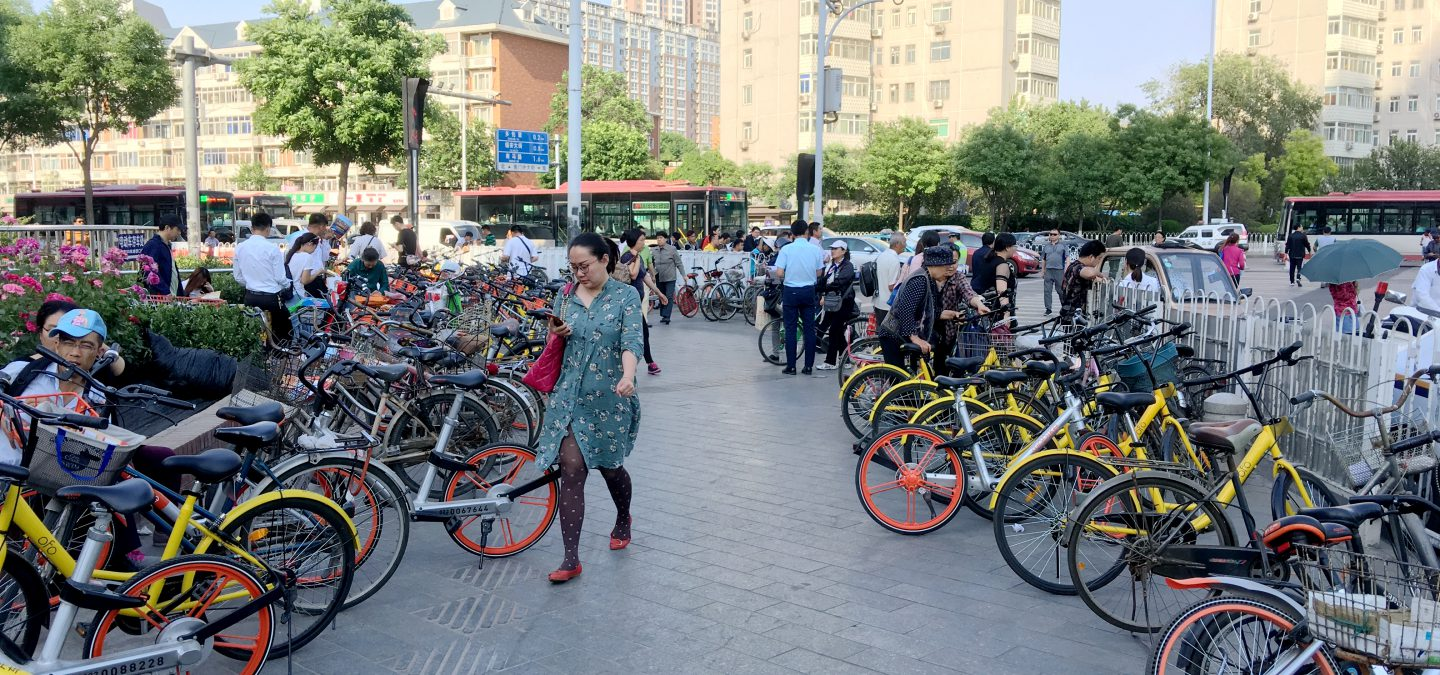

##### **Project Type**    - $\color{GREEN}{\text{EDA/Regression}}$:
##### **Contribution**    - $\color{GREEN}{\text{INDIVIDUAL}}$:
##### **Team Member 1 -** - $\color{GREEN}{\text{DIWAN MOHD TAHA KHAN}}$:


# **Project Summary -**


Bike Seoul is a cool bike rental service in Seoul, South Korea, aiming to reduce traffic and promote eco-friendly transportation. It lets people rent bikes from one spot and drop them off at another, making getting around the city easy and green.

Recently, more people have been using Bike Seoul, so the city needed a better way to manage it all. They wanted to predict how many bikes people would need in different places and times. This way, they could make sure there were enough bikes where people wanted them and not too many where they weren't needed.

To do this, they used fancy computer stuff called machine learning. They gathered lots of info about bike rentals, like when and where people rented bikes, plus other stuff like the weather and holidays. Then they trained a computer model to learn from all this info and make predictions about bike demand.

They tried out different ways of making predictions, like using math formulas and fancy algorithms. After testing lots of methods, they found one called Xtreme gradient boosting that worked really well. It was able to predict bike demand with high accuracy, around 93% for the training data and 90% for the testing data.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.

# **GitHub Link -**

GitHub Link here.

https://github.com/Asifdiwan23may1992/bike_sharing_demand_prediction_regression_project

# **Problem Statement**


Imagine you live in a big city where rental bikes are everywhere. But sometimes, it's hard to find one when you need it. That's a problem! So, we want to make sure there are always enough bikes available for people to use.

To solve this, we need a smart computer model that can predict how many bikes people will want at different times. This model will look at things like what time of day it is, what season it is, what the weather's like, and if it's a holiday. By considering all these factors, the model can tell us when and where people are likely to need bikes.

When we can predict demand accurately, we can make sure there are plenty of bikes ready for people to use. This means less waiting time and happier customers! Plus, it helps make city life better by reducing traffic jams, pollution, and greenhouse gas emissions.

So, by developing this predictive model, we're not just making bike sharing more convenient – we're also making cities cleaner, greener, and more sustainable for everyone.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

#visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb


# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source


In [ ]:
#Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
data=pd.read_csv ("/content/drive/MyDrive/DATA.csv/SeoulBikeData.csv", encoding="unicode_escape")

### Dataset First View

In [ ]:
# Dataset First Look
data.head(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("no. of rows=",data.shape[0])
print("no. of column=",data.shape[1])

### Dataset Information

In [ ]:
# Dataset Info
#checking information about dataset using info method
data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

In [ ]:
# Visualizing the missing values
data.isnull()
sns.heatmap(data.isnull(),cbar=False)

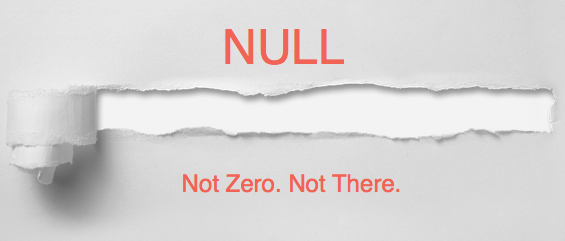

### What did you know about your dataset?

The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018. It includes hourly observations of 14 columns, such as the date, time, number of rented bikes, weather conditions, and other factors that may influence bike rental demand.

This dataset contains 8760 rows and 14 columns of the data.

There are no duplicate rows in the dataset.

Also there are no missing values or Null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

In [ ]:
# Dataset Describe
data.describe()

### Variables Description

***understanding variables

*   **Date** : The date of the observation.
*   **Rented Bike Count** : The number of bikes rented during the observation period.
*   **Hour** : The hour of the day when the observation was taken.
*   **Temperature(°C)** : The temperature in Celsius at the time of observation.
*   **Humidity(%)** : The percentage of humidity at the time of observation.
*   **Wind speed (m/s)** : The wind speed in meters per second at the time of observation.
*   **Visibility (10m)** : The visibility in meters at the time of observation.
*   **Dew point temperature(°C)** : The dew point temperature in Celsius at the time of observation.
*   **Solar Radiation (MJ/m2)** : The amount of solar radiation in mega-joules per square meter at the time of observation.
*   **Rainfall(mm)** : The amount of rainfall in millimeters during the observation period.
*   **Snowfall(cm)** : The amount of snowfall in centimeters during the observation period.
*   **Seasons** : The season of the year when the observation was taken.
*   **Holiday** : Whether the observation was taken on a holiday or not.
*   **Functioning Day** : Whether the bike sharing system was operating normally or not during the observation period.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
df = data.copy()

In [ ]:
# Renaming the columns
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
df.columns

In [ ]:
# converting date variable into datetime datatype
df['date'] = df['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Creating new columns for day and month
df['month'] = df['date'].apply(lambda x : x.month)
df['day_of_week'] = df['date'].apply(lambda x : x.isoweekday())

In [ ]:
# engineering new feature 'weekend' from day_of_week
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [ ]:
df.head(5)

In [ ]:
# Describe New Dataset
df.describe(include='all').round(2)

In [ ]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [ ]:
# defining dependent variable
dependent_variable = ['rented_bike_count']

In [ ]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?



* From the Date column, 'month' and 'day of the week' columns are created.

* From the 'day of the week' column, 'weekend' column is created where 6 and 7 are the weekends (Saturday and Sunday).

* We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#Visualization code for distribution of target variable
plt.figure(figsize=(8,6))
sns.distplot(df['rented_bike_count'])
plt.xlabel("Rented Bike Count")
plt.title('Distribution Plot of Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

a distplot is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables.

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

From above we can clearly see that the distribution is positively skewed (Right skewed).

It means that is not a distribution .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, our data is not normally distributed. So, before doing or implementing any model on this data we need to normalise this data.

#### Chart - 2 Distribution/ Box plot

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

##### 1. Why did you pick the specific chart?

 Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data.A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs.

 **Thus, we used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.**

 A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data.

 **Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.**

##### 2. What is/are the insight(s) found from the chart?

 We got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions.

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

In [ ]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(8,6))
  sns.regplot(x=i,y=dependent_variable[0],data=df)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helped a little bit from this we got to know that there are few variables which are showing some patterns with dependent variable this variable are maybe important feature while predicting for rented bike count so business needs focus on these variables.

#### Chart - 4 : Categorical variables with dependent variable (Bivariate)

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(8,6))
  sns.barplot(x=i,y=dependent_variable[0],data=df)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the rented bike count with other categorical variables we used bar charts.

##### 2. What is/are the insight(s) found from the chart?

**we got insights:**

1. In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock.
2. From season vs rented bike chart there is more demand in summer and less demand in winter.
3. From day_of_week vs rented bike chart there is high demand on working days.
4. From month chart we know that there is high demand in month of june.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got to know that when demand for bike is more so we can focus more on that portion.

#### Chart - 5 : Rented Bike vs Hour

In [ ]:
# ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.ylabel("Rented Bike Count")
plt.xlabel("Hour")
plt.title('Average bike rented per hour')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot, as well as try to meet the demand on that time slot.

#### Chart - 6 : Bike demand throughout the day (Multivariate)

In [ ]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.ylabel("Rented Bike Count")
    plt.xlabel("Hour")
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To show the demand of rented bike throughout the day on the basis of other categorical variable we used line plot drawing multiple lines on charts.

##### 2. What is/are the insight(s) found from the chart?

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7 : Categorical plot for seasons

In [ ]:
# plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=df)
plt.ylabel("Rented Bike Count")
plt.xlabel("Seasons")
plt.show()

##### 1. Why did you pick the specific chart?

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got to know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8 : Pie plot for seasons

In [ ]:
#Chart - 8 visualization code
df["seasons"] = df["seasons"].astype("category")
grouped_df = df.groupby("seasons")["rented_bike_count"].sum()

BikeSeasons = grouped_df.to_dict()
plt.gcf().set_size_inches(7,7)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of seasons

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 36% then autumn around 29%
2. Lowest demand in winter, it contributes around only 7%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season variable, which clearly gave indication about demand.

#### Chart - 9  : Temperature and Solar Radiation over time

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,10))

# Plot temperature
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='temperature', hue='month', data=df)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature by Date for each Month")

# Plot humidity
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='solar_radiation', hue='month', data=df)
plt.ylabel('Solar Radiation')
plt.xlabel('Date')
plt.title("Solar Radiation by Date for each Month")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

##### 2. What is/are the insight(s) found from the chart?

As expected temperature rises during summer months and lowers in winter months.

Similarly solar radiation is more in summer months compared to winter months, also huge fluctuations in solar radiation may be caused due to day-night cycle as there is no sunlight at night time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### Chart - 10 : Avg Rented Bike Count by Wind speed

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='wind_speed', y='rented_bike_count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Wind Speed")
plt.title("Avg Rented Bike Count by Wind speed (m/s)")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over wind speed).

##### 2. What is/are the insight(s) found from the chart?

Initially wind speed increases, the demand increases since flowing air creates better weather and less heat, although too high wind speed created storm and all so too high speed leads to decreases in demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### Chart - 11  : Avg Rented Bike Count by Humidity

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='humidity', y='rented_bike_count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Humidity")
plt.title("Avg Rented Bike Count by Humidity(%)")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over humidity).

##### 2. What is/are the insight(s) found from the chart?

After certain level as humidity increases demand decreases as too much humidity may generally caused due to rain or snowfall as we already saw they leads to decrease in demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### Chart - 12 : Correlation Heatmap

In [ ]:
# Chart - 12 visualization code
df_numeric = df.select_dtypes(include=['int64', 'float64', 'bool'])
corr = df_numeric.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3. Other than that we didnt see any correlation.

#### Chart - 13  : Pair Plot

In [ ]:
# Chart - 13 visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any relationship.

## ***5. Hypothesis Testing***

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing

Based on above chart experiments i have noticed that our dependent variable (Rented Bike Demand) does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

1.   Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.
2.   Rented Bike Demand during **rush hour** (*7-9AM & 5-7PM*) and **non-rush hour** are different.
3.   Average Rented Bike Demand is different in different seasons.

## Hypothetical Statement - 1
Rented Bike Demand in hot weather is higher compared to demand in cold weather.

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.

   Null Hypothesis:  Ho:μcold=μhot

   Alternate Hypothesis :  H1:μcold≠μhot

   Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'hot' and 'cold' temperature groups
hot_temps = df[df['temperature'] >= 20]['rented_bike_count']
cold_temps = df[df['temperature'] < 20]['rented_bike_count']

In [ ]:
print("Cold temperature Bike Demand Variance: ", np.var(cold_temps))
print("Hot temperature Bike Demand Variance: ", np.var(hot_temps))

In [ ]:
# Sample sizes for different temperature groups
print("Hot Temp sample size:", hot_temps.shape[0])
print("Cold Temp sample size:", cold_temps.shape[0])

In [ ]:
# Perform the t-test
import scipy
t_stat, p_val = scipy.stats.ttest_ind(hot_temps, cold_temps, equal_var=False)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")

# Hypothetical Statement - 2 :

Rented Bike Demand during rush hour (7-9AM & 5-7PM) is higher compared to non-rush hour.

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis:  Ho:μrush=μnon−rush

Alternate Hypothesis :  H1:μrush≠μnon−rush

Test Type: Two-sample t-test

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create subsets of the data based on hour
rush_hour = df[(df['hour'] >= 7) & (df['hour'] <= 9) | (df['hour'] >= 17) & (df['hour'] <= 19)]['rented_bike_count']
non_rush_hour = df[~((df['hour'] >= 7) & (df['hour'] <= 9) | (df['hour'] >= 17) & (df['hour'] <= 19))]['rented_bike_count']

In [ ]:
print("Rush Hour Bike Demand Variance: ", np.var(rush_hour))
print("Non-Rush Hour Bike Demand Variance: ", np.var(non_rush_hour))

In [ ]:
# Sample sizes for different hours
print("Rush Hour sample size:", rush_hour.shape[0])
print("Non-Rush Hour sample size:", non_rush_hour.shape[0])

In [ ]:
# Conduct a two-sample t-test to compare the mean bike rental demand during rush hour with the mean bike rental demand during non-rush hour times
t_stat, p_val = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

# Print the t-test results
# print('t-statistic:', t_stat)
# print('p-value:', p_val)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")

# Hypothetical Statement - 3 :

Rented Bike Demand is different in different seasons with highest in summer and lowest in winter.

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis:  Ho:  No significant difference between rented bike counts for different seasons.

Alternate Hypothesis :  H1:  Significant difference between rented bike counts for different seasons.

Test Type: One-way ANOVA test

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
# Sample sizes for different seasons
df.groupby('seasons')['rented_bike_count'].count()

In [ ]:
# Group the data by season and calculate the mean number of bike rentals for each season
season_means = df.groupby('seasons')['rented_bike_count'].mean()

# Conduct the ANOVA test
f_stat, p_value = scipy.stats.f_oneway(df.loc[df['seasons']=='Spring', 'rented_bike_count'],
                                  df.loc[df['seasons']=='Summer', 'rented_bike_count'],
                                  df.loc[df['seasons']=='Autumn', 'rented_bike_count'],
                                  df.loc[df['seasons']=='Winter', 'rented_bike_count'])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_val)
print()

# Conduct Tukey's HSD test for detailed difference b/w each groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df['rented_bike_count'], df['seasons'])

# Print the Tukey HSD test results
print(tukey_results)

# 6. Feature Engineering & Data Pre-processing :



### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum().sum()

Note- There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
'''# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))

# Removing outliers by Capping:
for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
  upper_limit = data_2[col].quantile(0.99)
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])'''

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of rented bike count and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

###Note :-

1. I have tried to remove the outliers but it has seen that there is drop in performance after removing the outliers around 10% drop in model performance

So, i have decided that i will perform the model without removing the outliers.

In [ ]:
df.columns

### 3. Categorical Encoding

In [ ]:
# Converting snowfall and rainfall to categorical attributes
df['snowfall'] = df['snowfall'].apply(lambda x: 1 if x>0 else 0)
df['rainfall'] = df['rainfall'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
# Encoding the visibility column
df['visibility'] = df['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [ ]:
# Encoding
df['func_day'] = np.where(df['func_day'] == 'Yes',1,0)
df['holiday'] = np.where(df['holiday'] == 'Holiday',1,0)

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns = ['hour', 'visibility', 'month', 'day_of_week' ])

In [ ]:
df.columns

What all categorical encoding techniques have you used & why did you use those techniques?

Since there are very few day on which there was snowfall / rainfall, it is in my interest that i convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

For visibility

When

Visibility >= 20 Km ---> Clear (high visibility)

4 Km <= Visibility < 10 Km ---> Haze (medium visibility)

Visibility < 4 Km ---> Fog (low visibility)

Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

For func day and holiday
There are two categories whether its holiday or func day so we use 0 and 1 for that.

For Hour, visibility, month & day of the week
we use here one hot encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the temperature and dew temperature are highly correlated

# Plotting Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(9,6))
sns.scatterplot(x='temperature',y='dew_point_temp',data=df)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')
plt.show()

In [ ]:
# Correlation
df[['temperature','dew_point_temp']].corr()

In [ ]:
# Creating new temperature column with 50% of both temp
df['temp'] = 0.5*df['temperature'] + 0.5*df['dew_point_temp']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['rented_bike_count','temperature','dew_point_temp']]
features

In [ ]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [ ]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [ ]:
continuous_feature_df

In [ ]:
calc_vif(df[[i for i in continuous_feature_df]])

In [ ]:
# Removing Temperature and dew point temperature
calc_vif(df[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

In [ ]:
# Dropping data, weekend, temperature and dew_point_temperature
df.drop(['date','weekend', 'dew_point_temp', 'temperature','seasons'],axis=1, inplace=True)

In [ ]:
# This is the final data for modeling
df.head()

#####What all feature selection methods have you used and why?

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF and remove those who are having high VIF value.

#####Which all features you found important and why?

From above methods i have found that there is high correlation between temperature and dew point temperature. So, i take 50 % of the both and create new variable 'temp' by adding both of them.

### 5. Data Transformation

In [ ]:
# Transform Your data
# Visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable
df[dependent_variable].skew()

In [ ]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.log1p(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

In [ ]:
# Visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(9,5))
sns.distplot(np.sqrt(df[dependent_variable]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.sqrt(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable after sqrt transformation
np.sqrt(df[dependent_variable]).skew()

In [ ]:
# Defining dependent and independent variables
X = df.drop('rented_bike_count',axis=1)
y = np.sqrt(df[dependent_variable])

###  I have ploted distribution plot and also i did normality test and i have found that the data is not normally distributed, it needs transformation.

So, first i have calculate the skewness value and i have found that the rented bike attribute is positively skewed so i used log transfomation but it affected negatively.

So, i finally used square root transformation & now the data looks normally distrubuted & skewness is also reduced.

### 6. Data Scaling

In [ ]:
features

In [ ]:
features = [i for i in df.columns if i not in ['rented_bike_count']]

In [ ]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

##### Which method have you used to scale you data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why?

It is surprising to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle.

So, in this case i have split 80% of the data into train and 20% into test.

# 7. ML Model Implementation :

In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(13,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=15)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(9,7))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 15)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])


### ML Model - 1 : Linear Regression

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [ ]:
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

In [ ]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

In [ ]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [ ]:
score['Linear regression tuned'] = linear_score2
score

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training data, I found R2 score of 0.784428 & 88090.659090 and 201.806803 as MSE and MAE respectively.

For testing data, I found R2 score of 0.789520 & 88090.659090 and 201.806803 as MSE and MAE respectively.

For Both training and testing data,** no improvement** is seen.

### ML Model - 2 : Lasso Regression

In [ ]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [ ]:
score

It is seen that using Lasso regression analysis the performance of the model has drop down. So i will try to tuned the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

In [ ]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

In [ ]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

After tuning i have seen that there is increse in performance from 52% to 78%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

### ML Model - 3 : Ridge Regression

In [ ]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [ ]:
score

I have used Ridge regression technique to check the performance of the model and i have found that there is no significant difference in between linear regression and Ridge.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

In [ ]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

I have tuned Ridge regression using hyperparametric technique & check the performance of the model and i have found that there is no significant difference in between tuned and without tuned.

It performs well only when there is multicollinearity or overfitting situation is present in our case we have already handle the multicollinearity situation, thats why it is not showing any difference in performance.

### ML Model - 4 : Decision Tree

In [ ]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [ ]:
score

From the decision tree algorithm i got train R2 score is 1 and test R2 score is 82% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
dt_best_params

In [ ]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [ ]:
# Fitting model
dt_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

In [ ]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

From the above tuned Decision tree regression, it has seen that earlier that we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 83% on train and 78% on test data.

### ML Model - 5 : Random Forest

In [ ]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [ ]:
score

Here i have seen that using random forest, regression accuracy of the train and test model increases 98% and 90% respectively, which seems to be a good model for prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [ ]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# Best parameters for random forests
rf_best_params

In [ ]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [ ]:
# Fitting model
rf_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score


After tuning the random forest algorithm it has seen that there is drop in performance both in train and test score so i am not going to use this model.

### ML Model - 6 : Gradient Boosting Regressor

In [ ]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [ ]:
score

Using Gradient Boosting Regressor i have got low accuracy around 82% and 81% on train and test data respectively, which is less than random forest, decision tree algorithm.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [ ]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [ ]:
# Best parameters for Gradient Boosting Model
gb_best_params

In [ ]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [ ]:
# Fitting model
gb_model.fit(X_train,y_train)

In [ ]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

In [ ]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

In [ ]:
score

After using the Randomised search CV, the model performs very well it gave accuracy 99% on train data & 93% on test data which is very good model accuracy. But it is overfitting the model's training accuracy is almost 100%.

### ML Model - 7 : Extreme Gradient Boosting Regressor

In [ ]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [ ]:
score

Using Extreme Gradient Boosting Regressor i have got accuracy around 97% and 92% on train and test data respectively, which is very good till now, than others algorithm.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [ ]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [ ]:
# Best parameters for XG boost Model
xgb_best_params

In [ ]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [ ]:
# Fitting model
xgb_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

After tuning the model i have got accuracy on train data arround 99 % and 93% on test data which is very good model accuracy, like Gradient Boosting Tuning data. But it is overfitting the model's training accuracy is almost 100%.

So, i would like to go with the model accuracy data of XGboost, before tuning. Which is 97% on train data and 92% on test data.

### Plot R2 scores for each model

In [ ]:
score.columns

In [ ]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

### Plot of adjusted R2 score

In [ ]:
# Removing the overfitted models which have more than 5% gap between train and test values
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
score_t['diff']=score_t['Train R2']-score_t['Test R2']                   #creating new column diff of train R2 and test R2 score
remove_models = list(score_t[score_t['diff']>=.05].index)                #creating a list of models which have difference more than .05 that is 5%
remove_models

adj = score_t['Adjusted R2'].drop(remove_models)                     #creating a new dataframe with required models and adjusted r2 score


# Visualizing a bar plot for adjusted R2 score
plt.figure(figsize=(12,7))
plots = sns.barplot(x=list(adj.index), y=adj)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=30)

plt.title(" Adjusted R2 score", fontsize = 15)
plt.xlabel('Models', fontsize = 12)
plt.ylabel('Score', fontsize = 12)

# Setting limit of the y axis from 0 to 30
plt.ylim(0,1)
plt.show()

### **SHAP(Shapley additive Explanations)**

---



In [ ]:
pip install shap

In [ ]:
# Importing shap
import shap

In [ ]:
# Shap explainer for xgb model (tree based)
explainer = shap.TreeExplainer(xgb_model, X_train, feature_names=features)

In [ ]:
# Plotting
shap.initjs()

# Select an instance from the test set
instance = X_test[50, :]

# Compute the SHAP values for the instance
shap_values = explainer(instance)

# Create the SHAP force plot
shap.plots.force(shap_values)

The force plot shows the shap values for a particular instance.

Here i have considered the 50th index row values for the plot. I can see that the prediction is 22.54 (sqrt value). The different contribution of the columns is shown for getting the prediction.

In [ ]:
# Get shap values of test data
shap_values = explainer(X_test)

In [ ]:
# Plotting the SHAP summary plot
shap.summary_plot(shap_values, X_test)

In the summary plot i can see the top 20 columns and their impact on the prediction.
The red color indicates that the value of the columns is high and blue color shows that the value of the column is low.

For categorical columns, i have zeros and ones where zero is blue color and one is red color.

Shap values are also displayed and the impact on the prediction is also shown.
Towards the right hand side, the impact is positive (increases the predicted value) and towards the left hand side, the impact is negative (decreases the predicted value).

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

This bar plot shows the top 20 important features and the mean shap values. It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected extreme gradient boosting regressor as i achieved 97% training accuracy and 92% testing accuracy. Some models were overfitted so i did not consider them.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I HAVE USED (SHAP Shapley additive Explanations)  model explainability tool FOR feature importance EXPLAINATION

# **Conclusion**


The project effectively showcased how machine learning methods can accurately forecast bike demand in Seoul, unveiling several critical insights:

**Temporal** **Patterns**: It revealed that bike demand peaks during morning and evening hours, suggesting commuting as a primary use case. Additionally, demand is lower in winter and reaches its pinnacle in June, reflecting seasonal variations.

**Feature Correlation**: The study identified multicollinearity between temperature and dew point temperature, indicating their interdependent influence on bike demand prediction.

**Model Evaluation**: Various machine learning algorithms including linear regression, decision tree, random forest, gradient boosting, and Extreme Gradient Boosting (XGBoost) were tested. Notably, XGBoost exhibited the highest accuracy, achieving 97% on the training set and 92% on the test set.

**Outlier Handling**: Interestingly, the project concluded that removing outliers did not improve model performance and may even have adverse effects.

**Implications**: Overall, the research underscores the potential of machine learning in addressing real-world challenges. Its findings serve as a guide for future studies in this domain. The insights gleaned can be extrapolated to similar cities with bike sharing systems, enhancing operational efficiency and fostering positive outcomes for stakeholders.






### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***